## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset and read
df=pd.read_csv("winequality-red.csv")
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# Check the row and columns
print(f"There is {df.shape[0]} row and {df.shape[1]} columns present in dataset")

There is 1599 row and 12 columns present in dataset


## EDA(Exploratory Data Analysis)
EDA is an approch to analysis dataset to sammarize their main characteristic ,often
using visual methods,It helps in understanding the data identifying patterns and detecting
anomalies or outliers.

In [4]:
# Dimension of dataset
df.shape

(1599, 12)

In [5]:
# check the columns name
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
# Check for duplicate rows
if df.duplicated().any():
    df = df.drop_duplicates()
    print("Duplicate rows removed")
else:
    print("No duplicate rows present")

Duplicate rows removed


### Summary of Dataset

In [7]:
# basic information of all values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


In [8]:
# Find the statistical summary of datatype
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
# check the unique values
df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

### Explore Categorical veriables


In [10]:
categorical=[var for var in df.columns if df[var].dtype=='O']
print("There is {} categorical values are present \n".format(len(categorical)))
print("veriable are:",categorical)      

There is 0 categorical values are present 

veriable are: []


## Explore numerical veriables

In [11]:
numerical=[var for var in df.columns if df[var].dtype!='O']
print("There is {} categorical values are present \n".format(len(numerical)))
print("veriable are:",numerical)  

There is 12 categorical values are present 

veriable are: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [12]:
df[numerical].head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [13]:
# check the missing values in numerical values
df[numerical].isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Outliers

In [14]:
# calculate Thresold values
max_thresold=df['quality'].mean()+3*df['quality'].std()
min_thresold=df['quality'].mean()-3*df['quality'].std()
print(max_thresold,min_thresold)

8.093986396613998 3.1525183863146258


In [15]:
# Filter out outliers
df1=df[(df['quality']>min_thresold)&(df['quality']<max_thresold)]
df1.reset_index(drop=True,inplace=True)

In [16]:
# Dimension of new dataset
print("Before filter:\n",df.shape)
print("\nAFter filter:\n",df1.shape)

Before filter:
 (1359, 12)

AFter filter:
 (1349, 12)


In [17]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [18]:
# Good and Bad Quality
df['QualityLabel'] = np.where(df['quality'] >= 7, 'Good', 'Bad')

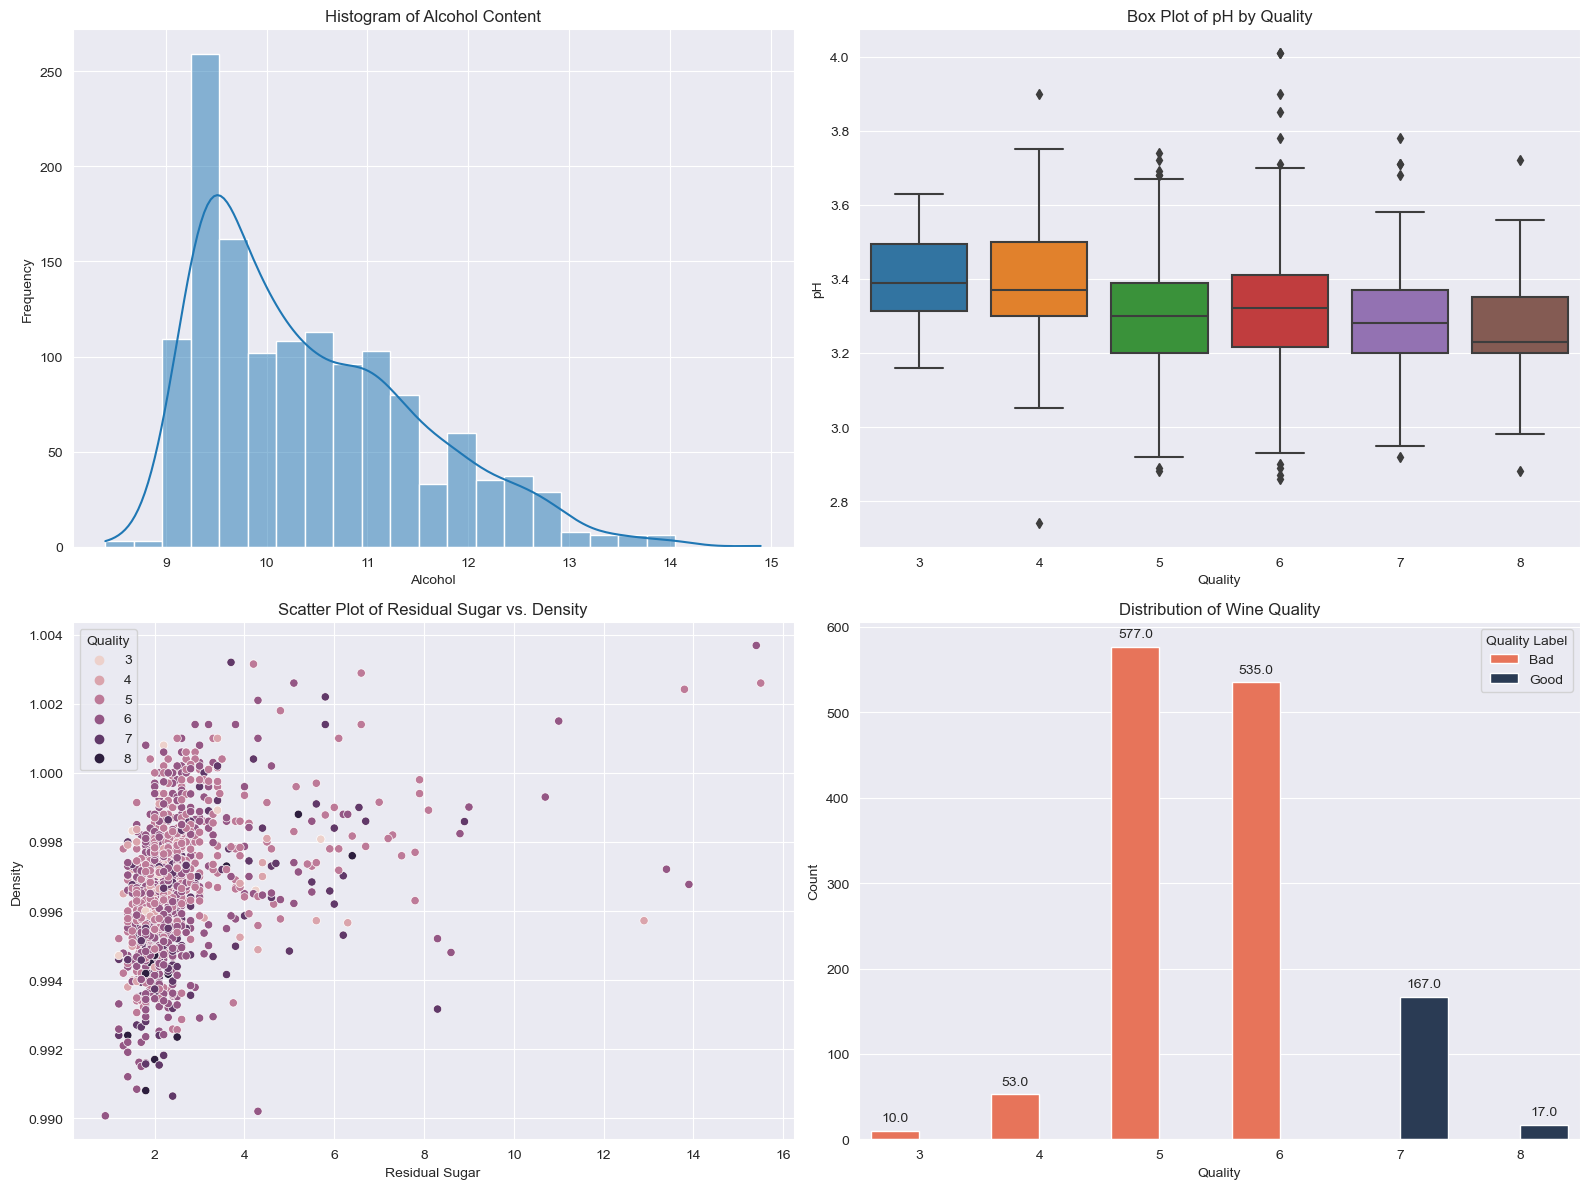

In [19]:
# Set the style for the plots
sns.set_style('darkgrid')
# Create a figure with subplots in a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
# Histogram of Alcohol Content
sns.histplot(df['alcohol'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Histogram of Alcohol Content')
axes[0, 0].set_xlabel('Alcohol')
axes[0, 0].set_ylabel('Frequency')

# Box Plot of pH by Quality
sns.boxplot(x='quality', y='pH', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Box Plot of pH by Quality')
axes[0, 1].set_xlabel('Quality')
axes[0, 1].set_ylabel('pH')

# Scatter Plot of Residual Sugar vs. Density
sns.scatterplot(x='residual sugar', y='density', hue='quality', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Scatter Plot of Residual Sugar vs. Density')
axes[1, 0].set_xlabel('Residual Sugar')
axes[1, 0].set_ylabel('Density')
axes[1, 0].legend(title='Quality')

# Count Plot of Wine Quality with QualityLabel
QualityLabelColor = {
    'Good': '#23395B',
    'Bad': '#FF6542'
}
sns.countplot(x='quality', data=df, palette=QualityLabelColor, hue='QualityLabel', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Wine Quality')
axes[1, 1].set_xlabel('Quality')
axes[1, 1].set_ylabel('Count')

# Annotate the bars in the count plot
for p in axes[1, 1].patches:
    axes[1, 1].annotate(format(p.get_height(), '.1f'), 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', 
                        xytext=(0, 9), 
                        textcoords='offset points')

# Move the legend to the top right in the count plot
axes[1, 1].legend(loc='upper right', title='Quality Label')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

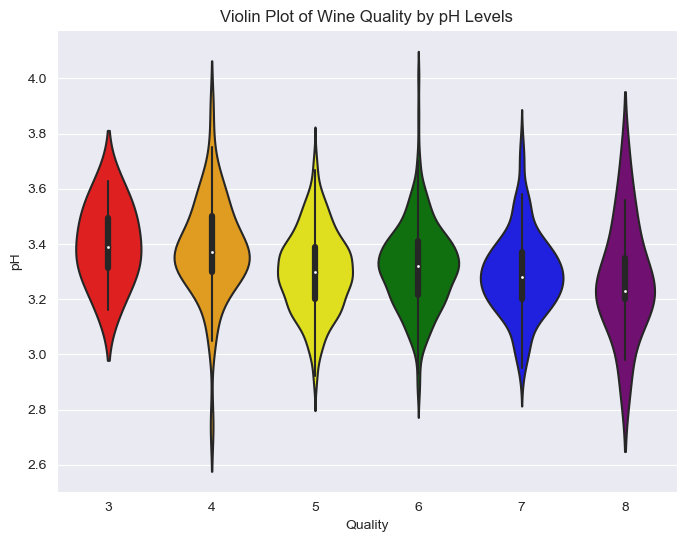

In [20]:
#Violin Plot of Wine Quality by pH Levels
quality_colors = {'3': 'red', 
                  '4': 'orange', 
                  '5': 'yellow', 
                  '6': 'green', 
                  '7': 'blue', 
                  '8': 'purple',
                  '9': 'pink'}
# Set the style for the plots
sns.set_style('darkgrid')
# Violin plot of wine quality by pH levels with custom colors
plt.figure(figsize=(8, 6))
sns.violinplot(x='quality', y='pH', data=df, palette=quality_colors.values())
plt.title('Violin Plot of Wine Quality by pH Levels')
plt.xlabel('Quality')
plt.ylabel('pH')
plt.show()

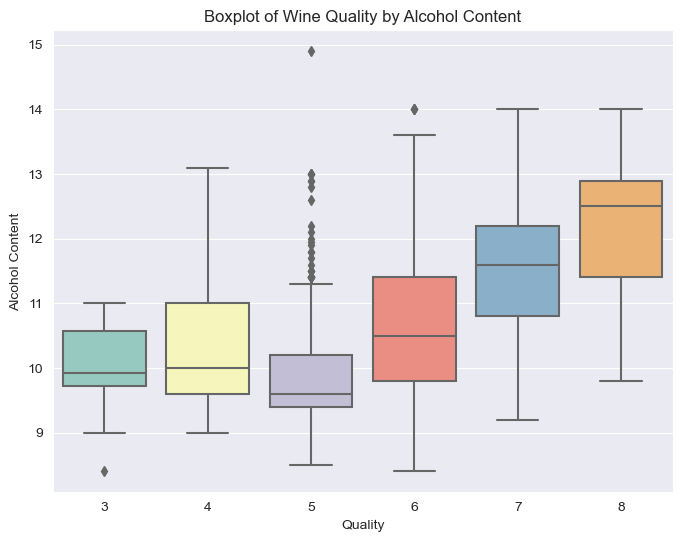

In [21]:
# Boxplot of wine quality by alcohol content
plt.figure(figsize=(8, 6))
sns.boxplot(x='quality', y='alcohol', data=df, palette='Set3')
plt.title('Boxplot of Wine Quality by Alcohol Content')
plt.xlabel('Quality')
plt.ylabel('Alcohol Content')
plt.show()

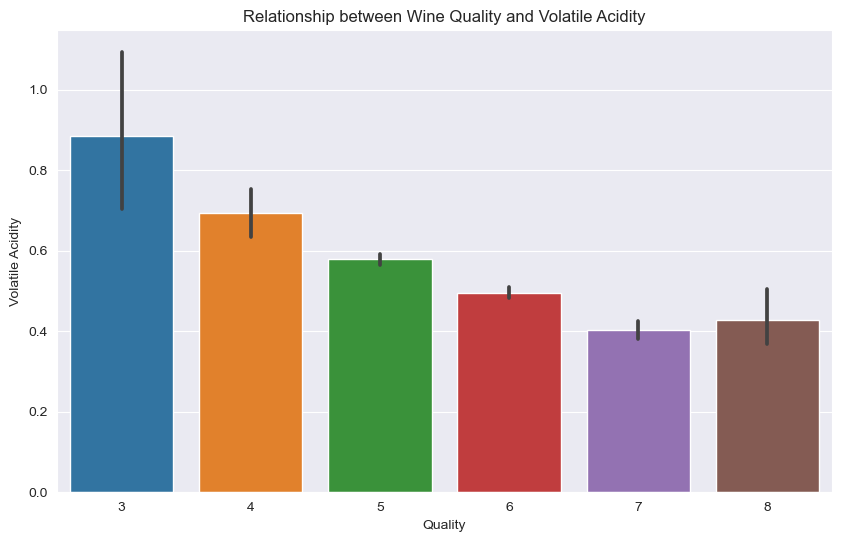

In [22]:
# Create a bar plot of wine quality against volatile acidity
plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='volatile acidity', data=df)
plt.title('Relationship between Wine Quality and Volatile Acidity')
plt.xlabel('Quality')
plt.ylabel('Volatile Acidity')
plt.show()


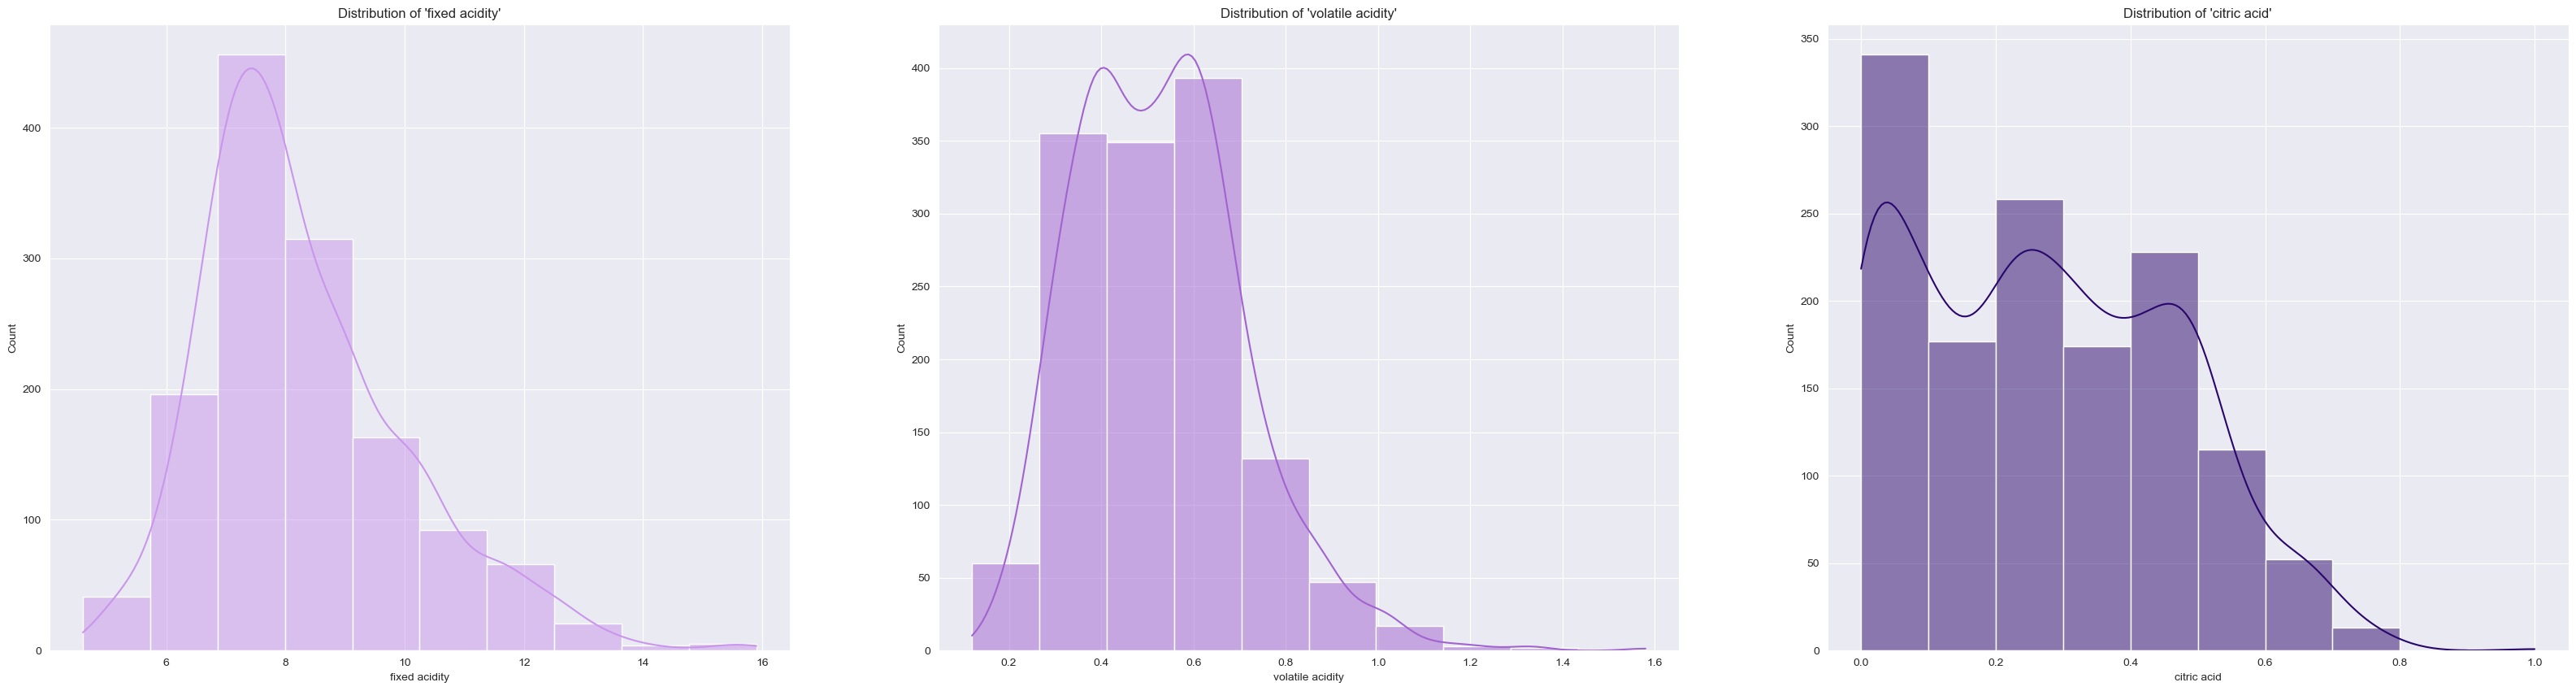

In [23]:
# Define the subplots and axes
my_fig, my_axes = plt.subplots(1, 3, figsize=(40, 10))

# Plot the distribution of 'fixed acidity'
sns.histplot(ax=my_axes[0], x=df["fixed acidity"],
             bins=10,
             kde=True,
             cbar=True,
             color="#CA96EC").set(title="Distribution of 'fixed acidity'");
# Plot the distribution of 'volatile acidity'
sns.histplot(ax=my_axes[1], x=df["volatile acidity"],
             bins=10,
             cbar=True,
             kde=True,
             color="#A163CF").set(title="Distribution of 'volatile acidity'");
# Plot the distribution of 'citric acid'
sns.histplot(ax=my_axes[2], x=df["citric acid"],
             bins=10,
             kde=True,
             cbar=True,
             color="#29066B").set(title="Distribution of 'citric acid'");

plt.show()


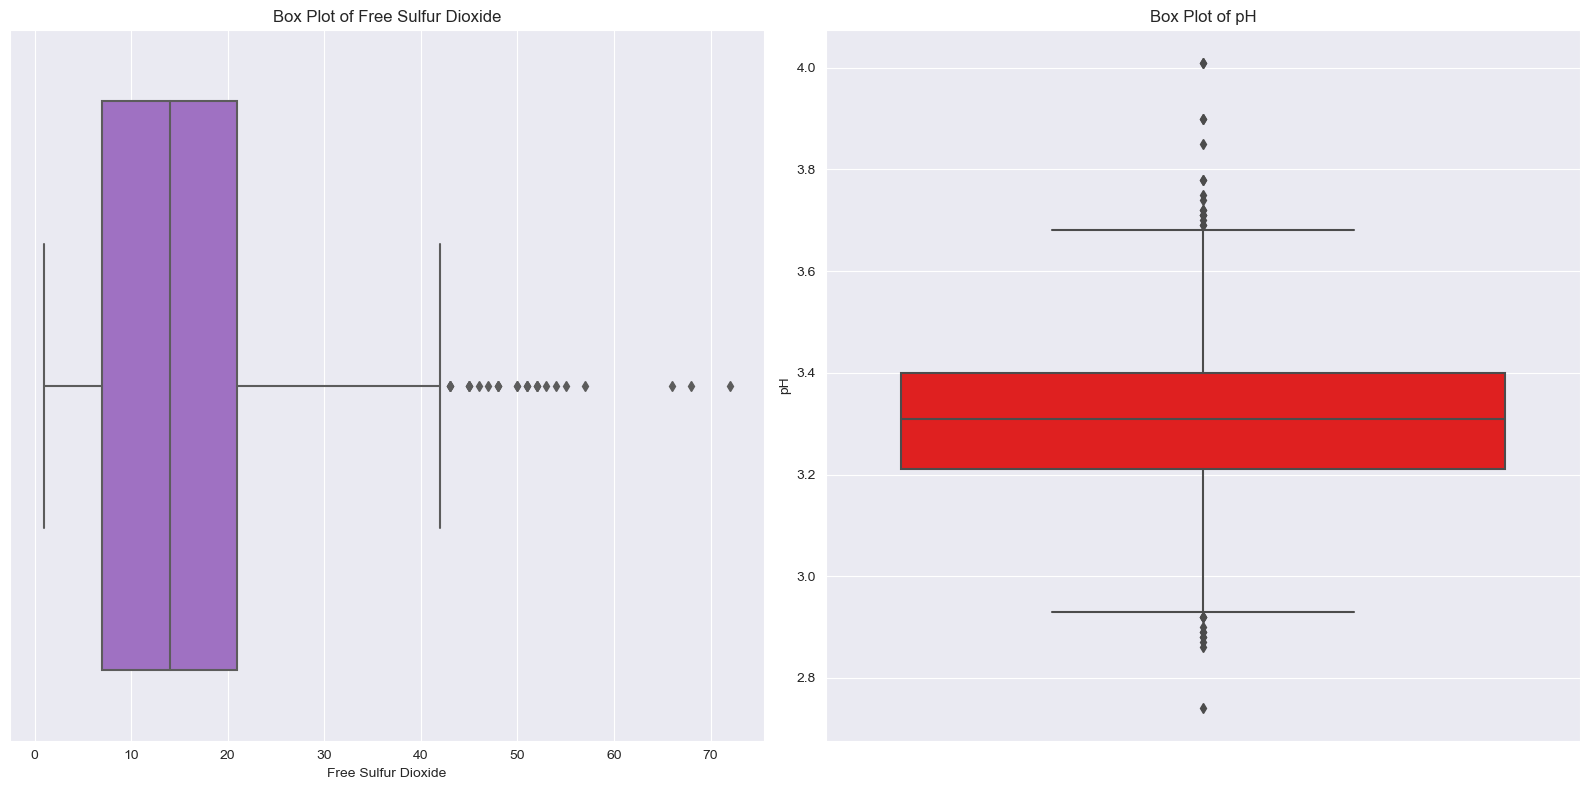

In [24]:
# it contains columns named 'free sulfur dioxide' and 'pH'
fig, axes = plt.subplots(1, 2, figsize=(16, 8))  # 1 row, 2 columns
sns.set_style("darkgrid")
# Create the box plot for 'free sulfur dioxide'
sns.boxplot(ax=axes[0], x=df['free sulfur dioxide'], color="#A163CF")
axes[0].set_title('Box Plot of Free Sulfur Dioxide')
axes[0].set_xlabel('Free Sulfur Dioxide')
# Create the box plot for 'pH'
sns.boxplot(ax=axes[1], y=df['pH'], color="#FF0000")
axes[1].set_title('Box Plot of pH')
axes[1].set_ylabel('pH')
# Adjust layout
plt.tight_layout()
# Show the plots
plt.show()



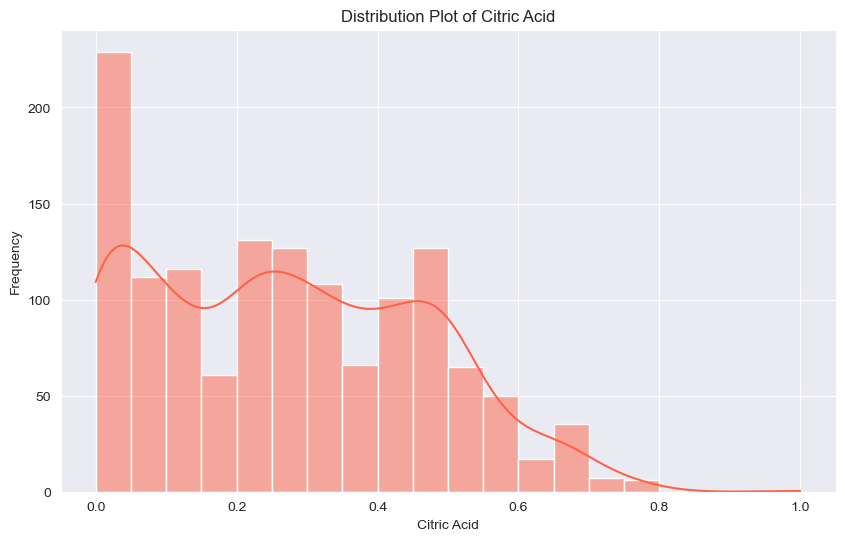

In [25]:
# 'citric acid'
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
# Create the distribution plot for 'citric acid'
sns.histplot(df['citric acid'], bins=20, kde=True, color="#FF6347")

plt.title('Distribution Plot of Citric Acid')
plt.xlabel('Citric Acid')
plt.ylabel('Frequency')
plt.show()

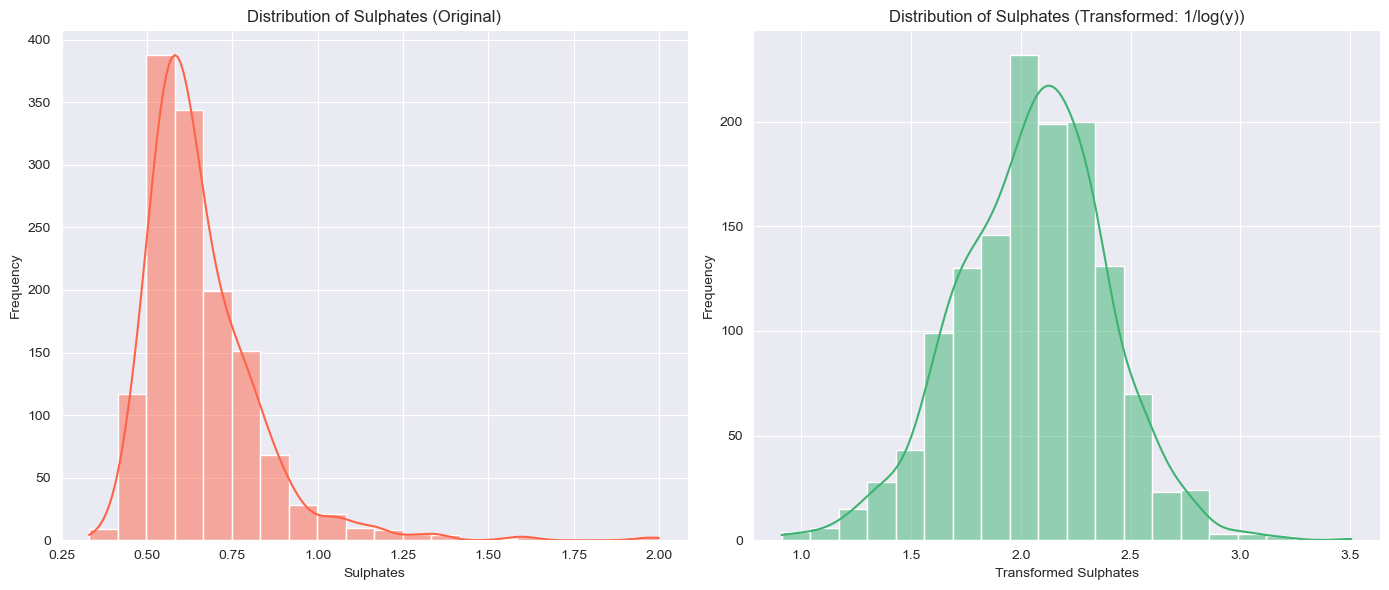

In [26]:
sulphates = df['sulphates']
transformed_sulphates = 1 / np.log(sulphates + 1) 
plt.figure(figsize=(14, 6))
sns.set_style("darkgrid")

# Plot the original distribution of sulphates
plt.subplot(1, 2, 1)
sns.histplot(sulphates, bins=20, kde=True, color="#FF6347")
plt.title('Distribution of Sulphates (Original)')
plt.xlabel('Sulphates')
plt.ylabel('Frequency')

# Plot the transformed distribution of sulphates
plt.subplot(1, 2, 2)
sns.histplot(transformed_sulphates, bins=20, kde=True, color="#3CB371")
plt.title('Distribution of Sulphates (Transformed: 1/log(y))')
plt.xlabel('Transformed Sulphates')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


### Data processing

In [27]:
# Check for non-numeric columns
non_numeric_cols = df.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)

Non-numeric columns: Index(['QualityLabel'], dtype='object')


In [28]:
# Convert categorical data to numeric using LabelEncoder if there are any non-numeric columns
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in non_numeric_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


## Decission tree

In [29]:
# Define feature columns and target variable
features = df.drop('quality', axis=1)
target = df['quality']

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree

In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)


In [32]:
# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

In [33]:
# Train the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [34]:
# Make predictions
y_pred = dt_model.predict(X_test)


In [35]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.59


In [36]:
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.06      0.08      0.07        13
           5       0.59      0.55      0.57       172
           6       0.58      0.63      0.60       164
           7       0.91      0.82      0.86        50
           8       0.00      0.00      0.00         4

    accuracy                           0.59       408
   macro avg       0.36      0.35      0.35       408
weighted avg       0.60      0.59      0.59       408



In [37]:
print('Confusion Matrix:')
cm = confusion_matrix(y_test, y_pred)
print(cm)

Confusion Matrix:
[[  0   0   4   1   0   0]
 [  0   1   4   8   0   0]
 [  2  11  94  65   0   0]
 [  1   4  56 103   0   0]
 [  0   0   0   0  41   9]
 [  0   0   0   0   4   0]]


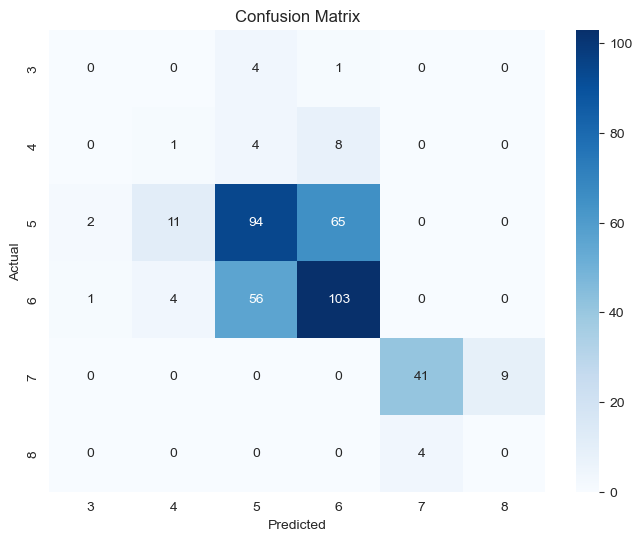

In [38]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(target), yticklabels=np.unique(target))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

In [49]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [50]:
# Make predictions
y_pred_rf = rf_model.predict(X_test)

In [51]:
# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')

Random Forest Accuracy: 0.71


In [52]:
print('Random Forest Classification Report:')
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        13
           5       0.69      0.69      0.69       172
           6       0.67      0.74      0.70       164
           7       0.93      1.00      0.96        50
           8       0.00      0.00      0.00         4

    accuracy                           0.71       408
   macro avg       0.38      0.40      0.39       408
weighted avg       0.67      0.71      0.69       408



C:\Users\trije\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\trije\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\trije\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [53]:
print('Random Forest Confusion Matrix:')
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

Random Forest Confusion Matrix:
[[  0   0   4   1   0   0]
 [  0   0   7   6   0   0]
 [  0   0 118  54   0   0]
 [  0   0  42 122   0   0]
 [  0   0   0   0  50   0]
 [  0   0   0   0   4   0]]


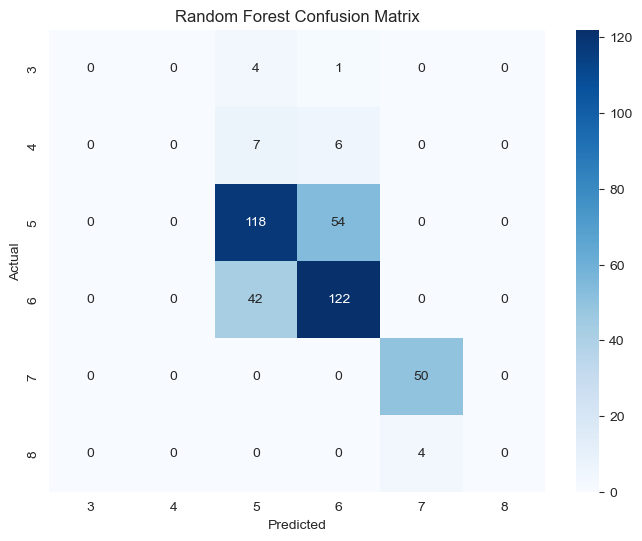

In [54]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(target), yticklabels=np.unique(target))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

## Conclusion
The Random Forest Classifier emerged as the best-performing model for this dataset with an accuracy of 0.71